# Preliminary Wrangling


## Preliminary Wrangling


>This document explores a dataset containing 113,937 loans with 81 variables on each loan



In [1]:
!jupyter nbconvert Communicate_Data_Findings.ipynb --to slides --template output-toggle.tpl


[NbConvertApp] Converting notebook Communicate_Data_Findings.ipynb to slides
[NbConvertApp] Writing 592962 bytes to Communicate_Data_Findings.slides.html


In [2]:
# import all packages and set plots 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [3]:
df=pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#over view of data 
df.shape

(113937, 81)

In [5]:
#over view of data 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [6]:
#show how many row duplicate
sum(df.duplicated())

0

In [7]:
#droping empty variables and unnassary columns
df.drop(['ListingKey', 'ListingNumber', 'ListingCreationDate',  'ClosedDate', 'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine', 'LoanKey','TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding', 'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber'], axis=1, inplace = True)

In [8]:
df.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,C,36,Completed,0.16516,0.1580,0.1380,NaN,NaN,NaN,NaN,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,HR,36,Completed,0.28269,0.2750,0.2400,NaN,NaN,NaN,NaN,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [9]:
#numric variables
num_vars = ['LoanOriginalAmount', 'BorrowerAPR', 'StatedMonthlyIncome','ProsperScore']
df_num = df[num_vars]
df_num.head()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,ProsperScore
0,9425,0.16516,3083.333333,NaN
1,10000,0.12016,6125.000000,7.0
2,3001,0.28269,2083.333333,NaN
3,10000,0.12528,2875.000000,9.0
4,15000,0.24614,9583.333333,4.0


In [10]:
#convert from object to data time
df['LoanOriginationDate'] = pd.to_datetime(df['LoanOriginationDate'])


In [11]:
#statistics for numeric variables
df_num.describe()

,LoanOriginalAmount,BorrowerAPR,StatedMonthlyIncome,ProsperScore
count,113937.00000,113912.000000,1.139370e+05,84853.000000
mean,8337.01385,0.218828,5.608026e+03,5.950067
std,6245.80058,0.080364,7.478497e+03,2.376501
min,1000.00000,0.006530,0.000000e+00,1.000000
25%,4000.00000,0.156290,3.200333e+03,4.000000
50%,6500.00000,0.209760,4.666667e+03,6.000000
75%,12000.00000,0.283810,6.825000e+03,8.000000
max,35000.00000,0.512290,1.750003e+06,11.000000


In [12]:
#drop empty rows
df = df.dropna(subset=['ProsperRating (Alpha)']).reset_index()
df.head()

,index,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1,3,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
2,4,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
3,5,NaN,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,6,NaN,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [13]:
#drop old index
df.drop(columns = ['index'],inplace = True)
df.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,NaN,36,Current,0.12016,0.0920,0.0820,0.07960,0.0249,0.05470,6.0,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
1,NaN,36,Current,0.12528,0.0974,0.0874,0.08490,0.0249,0.06000,6.0,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
2,NaN,36,Current,0.24614,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
3,NaN,60,Current,0.15425,0.1314,0.1214,0.11567,0.0449,0.07077,5.0,...,-25.33,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
4,NaN,36,Current,0.31032,0.2712,0.2612,0.23820,0.1275,0.11070,2.0,...,-22.95,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1


In [14]:

df = df[df['ProsperScore'].isnull()==False]


In [15]:
df['TotalProsperLoans'] =df['TotalProsperLoans'].fillna(0)

In [16]:
print(df.shape)
print(df.info())

(84853, 63)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 84853 entries, 0 to 84852
Data columns (total 63 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   CreditGrade                         0 non-null      object        
 1   Term                                84853 non-null  int64         
 2   LoanStatus                          84853 non-null  object        
 3   BorrowerAPR                         84853 non-null  float64       
 4   BorrowerRate                        84853 non-null  float64       
 5   LenderYield                         84853 non-null  float64       
 6   EstimatedEffectiveYield             84853 non-null  float64       
 7   EstimatedLoss                       84853 non-null  float64       
 8   EstimatedReturn                     84853 non-null  float64       
 9   ProsperRating (numeric)             84853 non-null  float64       
 10  ProsperRat

In [17]:
df['TotalProsperLoans'] =df['TotalProsperLoans'].fillna(0)


### the structure of  the  dataset


>the dataset contains 113937 loans and 81 features after initial cleaning it contain 8453 leons and 63 features 


### Features we have interests in it  to analysing it 

> I am interseted to figer out what  are features can be used to predict default on credit and the features are best for predicting (APR) for loan 

### Features in the dataset will support my investigation into feautrures of interest 

>I think the amount of loan  have effect on APR of the loan and the I expect the the borrowers Prosper rating have effect on default

# Univariate Exploration


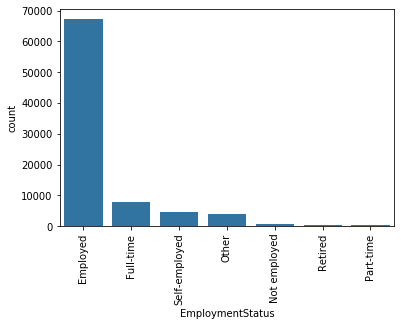

In [18]:
f= df['EmploymentStatus'].value_counts().index
base_color= sb.color_palette()[0]
sb.countplot(data=df, x='EmploymentStatus', color=base_color,order =f)
plt.xticks(rotation=90);

Most borrowers are employed and full time the rest of the categories represent a small fraction of borrowers

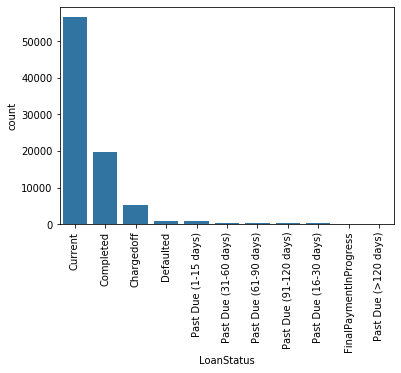

In [19]:
n= df['LoanStatus'].value_counts().index
sb.countplot(data=df, x='LoanStatus', color=base_color,order =n);
plt.xticks(rotation=90);

Most of the loans in the database are current loans, and the second in the database are completed loans and non-performing loans. A minority in the database, the loans that have passed their repayment time are divided into groups.

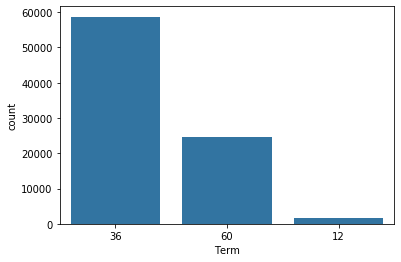

In [20]:
s=df['Term'].value_counts().index
sb.countplot(data=df, x='Term', color=base_color,order = s);

Most popular is 36 months out of 3 choices

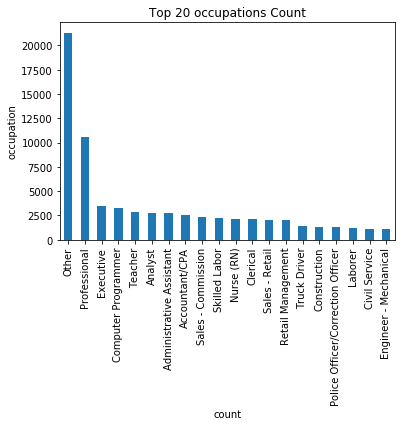

In [21]:
df['Occupation'].value_counts()[0:20].plot(kind='bar')
plt.title('Top 20 occupations Count')
plt.xlabel('count')
plt.ylabel('occupation')
plt.fontsize = [12,20]
plt.figsize=(15,15)
plt.xticks(rotation=90);

Most of the jobs are registered professional and there is no discrepancy in the percentages between the rest of the jobs and some of them

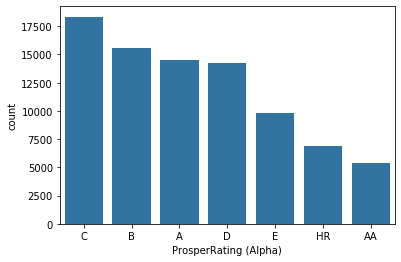

In [22]:

sb.countplot(data=df, x='ProsperRating (Alpha)', color=base_color ,order = df['ProsperRating (Alpha)'].value_counts().index);

The highest common classification is classification C, and the least common classification is AA

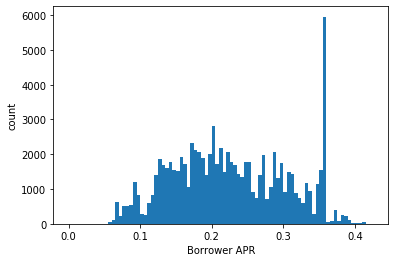

In [23]:
s=np.arange(0,df['BorrowerAPR'].max()+0.005,0.005);
plt.hist(data = df, x = 'BorrowerAPR',bins=s);
plt.xlabel('Borrower APR');
plt.ylabel('count');


the Borrower APR is normal distrabution 

In [24]:
df['BorrowerAPR'].describe()

count    84853.000000
mean         0.226658
std          0.079916
min          0.045830
25%          0.163280
50%          0.219450
75%          0.292540
max          0.423950
Name: BorrowerAPR, dtype: float64

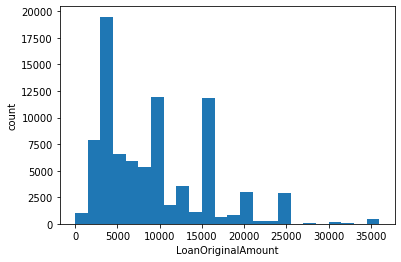

In [25]:
h=np.arange(0,df['LoanOriginalAmount'].max()+1500,1500)
plt.hist(data = df, x = 'LoanOriginalAmount',bins=h);
plt.xlabel('LoanOriginalAmount');
plt.ylabel('count');


In [26]:
df['LoanOriginalAmount'].describe()

count    84853.000000
mean      9083.440515
std       6287.860058
min       1000.000000
25%       4000.000000
50%       7500.000000
75%      13500.000000
max      35000.000000
Name: LoanOriginalAmount, dtype: float64

Most loans are less than  13500, and most borrowers tend to borrow loans whose numbers are multiples of 5,000 and that the normal distribution here will shift to the right.

### Discuss the distributions of variables of interest.

the Borrower APR is normal distrabution and Most loans are less than  13500, and most borrowers tend to borrow loans whose numbers are multiples of 5,000 and that the normal distribution here will shift to the right.

# Bivariate Exploration


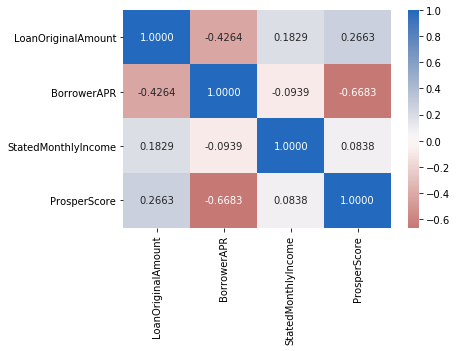

In [27]:
sb.heatmap(df[num_vars].corr(), annot = True, fmt = '.4f',cmap = 'vlag_r', center = 0);

In [28]:
sample = np.random.choice(df.shape[0], 6000, replace = False)
sample=df.loc[sample]
sample.head()

,CreditGrade,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
44783,NaN,36,Completed,0.18316,0.1469,0.1369,0.13460,0.0420,0.09260,5.0,...,-18.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,64
59991,NaN,36,Completed,0.07439,0.0710,0.0610,0.05500,0.0060,0.05500,7.0,...,-31.96,0.0,0.0,0.0,0.0,1.0,0,0,0.0,66
1306,NaN,36,Completed,0.25259,0.2148,0.2048,0.20000,0.0890,0.11100,4.0,...,-173.88,0.0,0.0,0.0,0.0,1.0,0,0,0.0,40
1296,NaN,60,Current,0.14453,0.1219,0.1119,0.10760,0.0349,0.07270,6.0,...,-82.86,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
12054,NaN,60,Current,0.23318,0.2085,0.1985,0.18316,0.0925,0.09066,3.0,...,-57.53,0.0,0.0,0.0,0.0,1.0,0,0,0.0,7


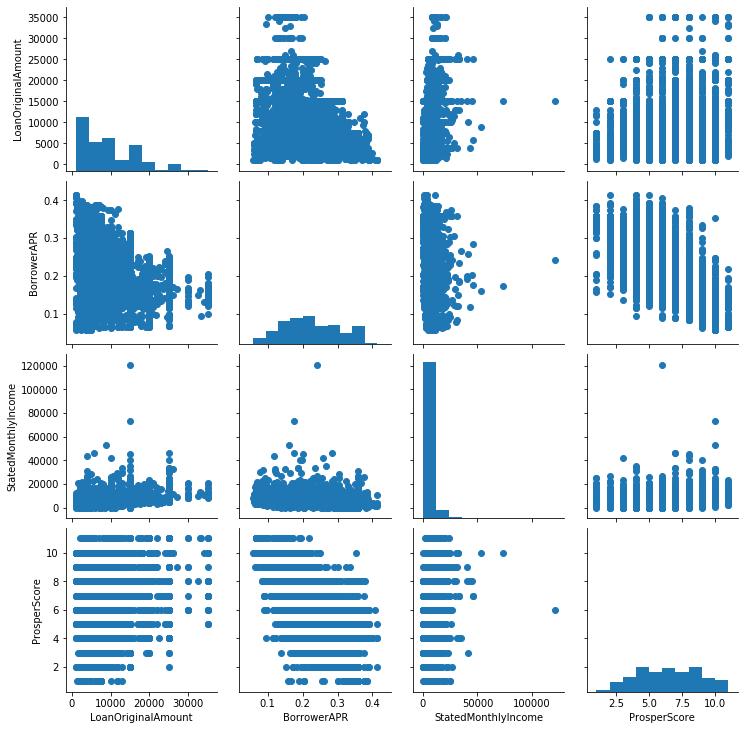

In [29]:
g = sb.PairGrid(data = sample, vars =num_vars)
g.map_offdiag(plt.scatter);
g.map_diag(plt.hist, bins=10);

The relation between the Loan orginal Amount and the  BorrowerAPR are nigative relation  and  in heat map the The correlation coefficient was -0.426 and that agree with my opinion the amount of loan have effect on APR of the loan

In [30]:
df['LoanStatus'].value_counts()

Current                   56576
Completed                 19664
Chargedoff                 5336
Defaulted                  1005
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Name: LoanStatus, dtype: int64

In [31]:
target=df[df['LoanStatus']=='Completed']   
Defaulted=df[df['LoanStatus']=='Defaulted']

target=target.append(Defaulted)

In [32]:
target['LoanStatus'].value_counts()

Completed    19664
Defaulted     1005
Name: LoanStatus, dtype: int64

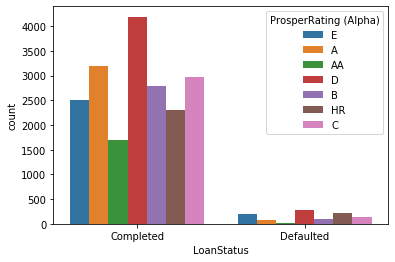

In [33]:
sb.countplot(data=target, x='LoanStatus', hue='ProsperRating (Alpha)');


the common rate in Defaulted is D and that not what I expected rate HR

### About some of the relationships you observed in this part of the investigation.

The relation between the Loan orginal Amount and the  BorrowerAPR are nigative relation  and  in heat map the The correlation coefficient was -0.426 and that agree with my opinion the amount of loan have effect on APR of the loan


### observe any interesting relationships between the other features

 the common rate in Defaulted is D and that not what I expected rate HR

# Multivariate Exploration


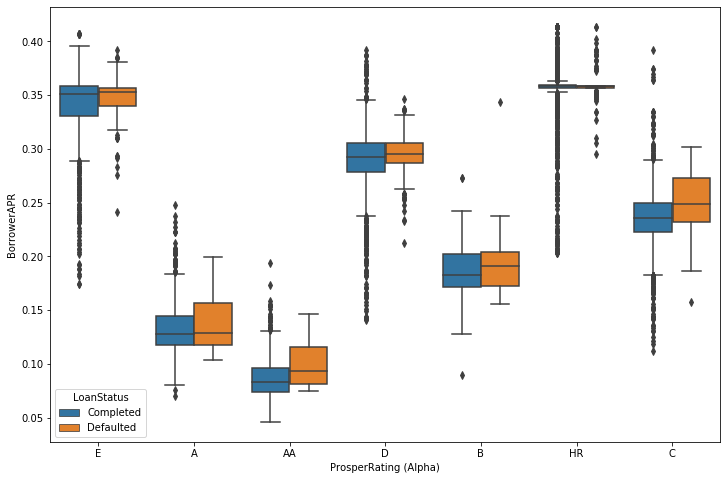

In [34]:
plt.figure(figsize = [12, 8])
#sb.violinplot(data=target, x='BorrowerAPR', y='LoanOriginalAmount', hue='LoanStatus')
sb.boxplot(data=target, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='LoanStatus')


Defaulted credits tend to be smaller than completed and the BorrowerAPR for rating E and HR  is higher than the others and the BorrowerAPR for A and AA is lower than the others 



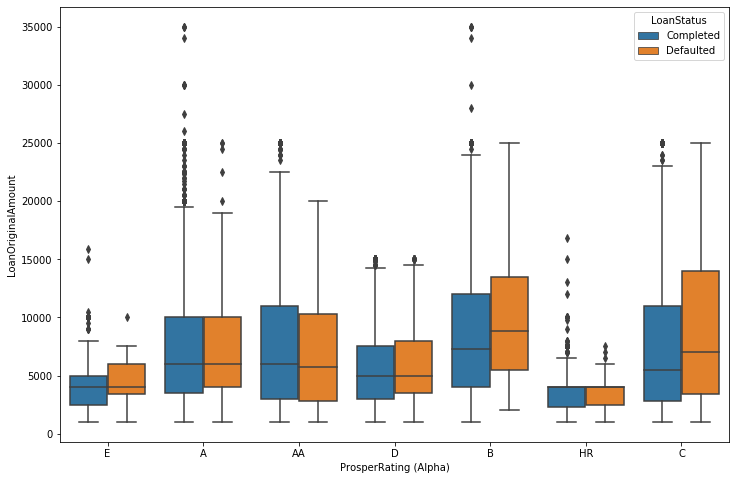

In [35]:
plt.figure(figsize = [12, 8])
sb.boxplot(data=target, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');


defaulted credits tend to be smaller than completed most of defaulted credits comes from low prposer rating 

### About some of the relationships you observed in this part of the investigation. 

>Defaulted credits tend to be smaller than completed and the BorrowerAPR for rating E and HR  is higher than the others and the BorrowerAPR for A and AA is lower than the others 



>defaulted credits tend to be smaller than completed most of defaulted credits comes from low prposer rating 

### Were there any interesting or surprising interactions between features?


>defaulted credits for individuals with high Prosper ratings tend to be larger than completed credits